In [18]:
!pip install snscrape
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install pandas tqdm

  ERROR: Error [WinError 2] Не удается найти указанный файл while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?



  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\admin\appdata\local\temp\pip-req-build-4_vnxau2


In [19]:
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter

AttributeError: 'FileFinder' object has no attribute 'find_module'

HONG KONG CRIME STATISTICAL ANALYSIS: POST-COVID INCREASE
Testing the Claim that Crime Decreased After COVID-19
All datasets saved successfully!
Main dataset: 7 years, 45 columns
Violent crimes: 7 years
Non-violent crimes: 7 years
Summary data: 7 years

Dataset preview:
   Year  Grand_Total_Crimes  Overall_Crime_Rate  Post_COVID
0  2013               72911                1016       False
1  2018               54225                 728       False
2  2019               59225                 789       False
3  2020               63232                 845        True
4  2021               64428                 869        True
5  2022               70048                 954        True
6  2023               90276                1198        True

FINAL EVIDENCE REPORT: POST-COVID CRIME INCREASE IN HONG KONG
PRE vs POST COVID-19 CRIME COMPARISON
Pre-COVID years: [2013, 2018, 2019]
Post-COVID years: [2020, 2021, 2022, 2023]

Grand_Total_Crimes:
  Pre-COVID mean: 62,120
  Post-COVID mean: 71,9

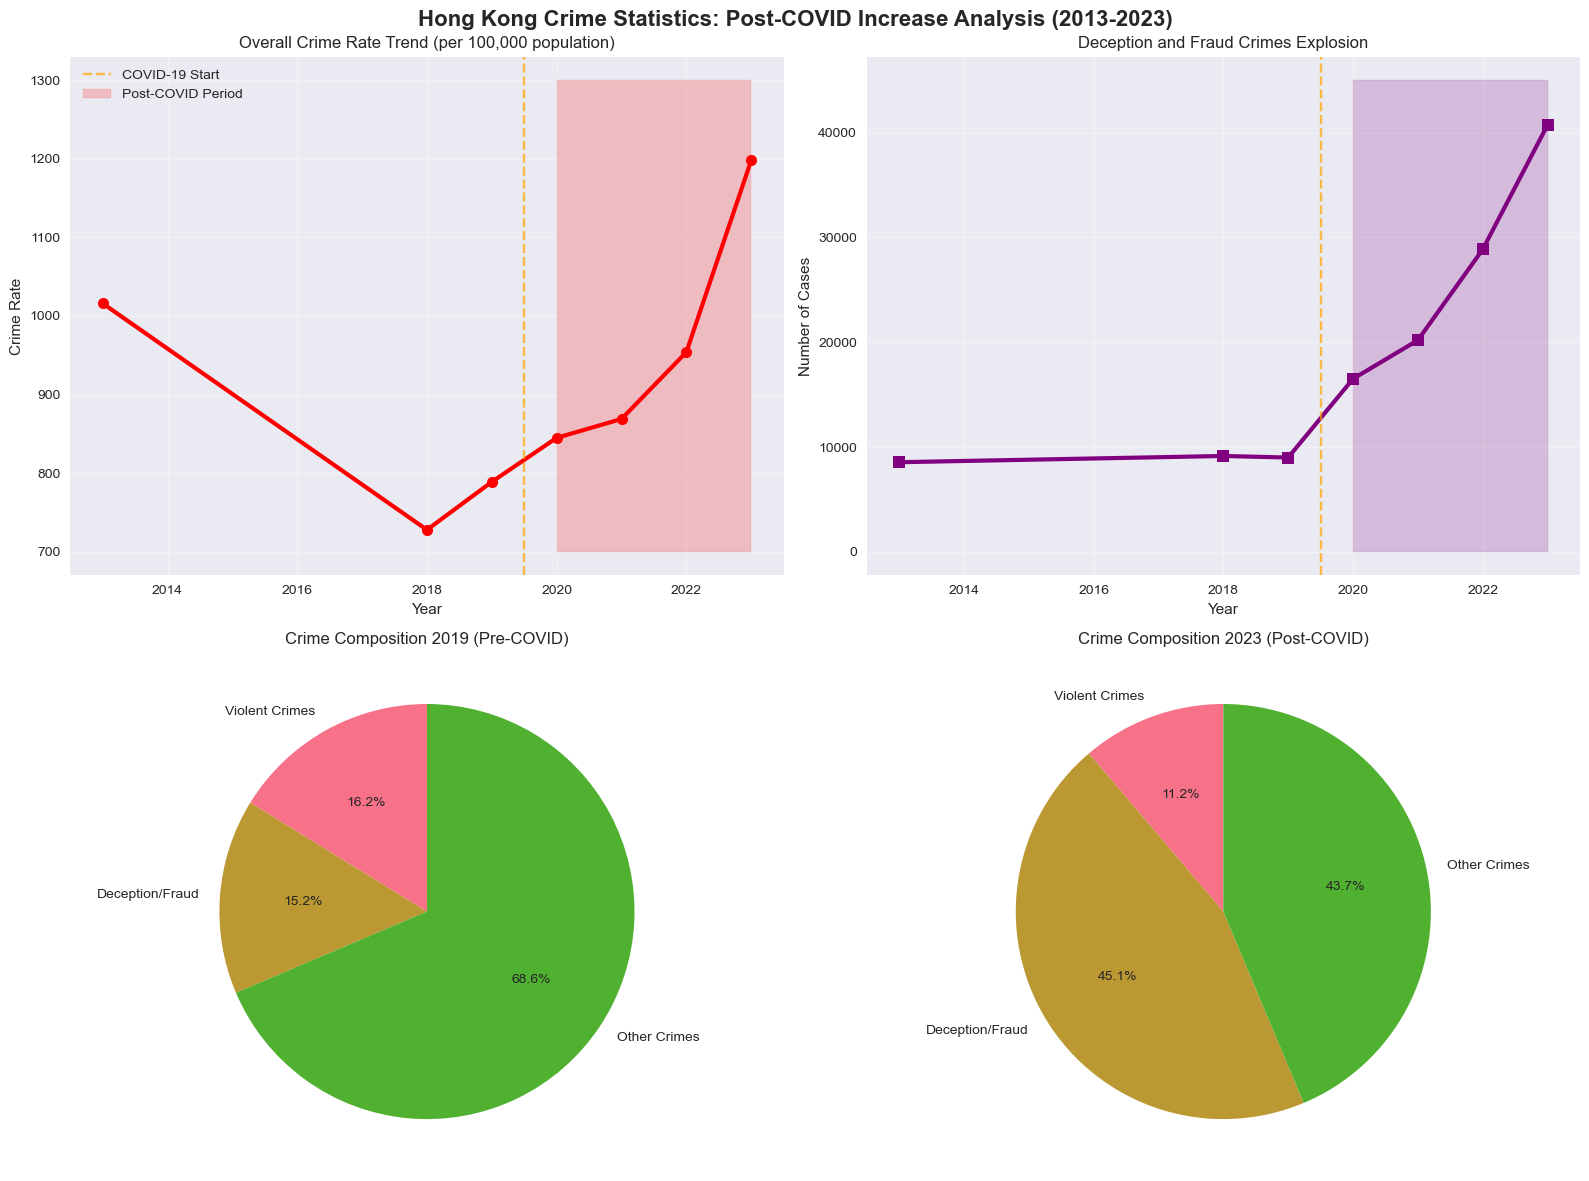

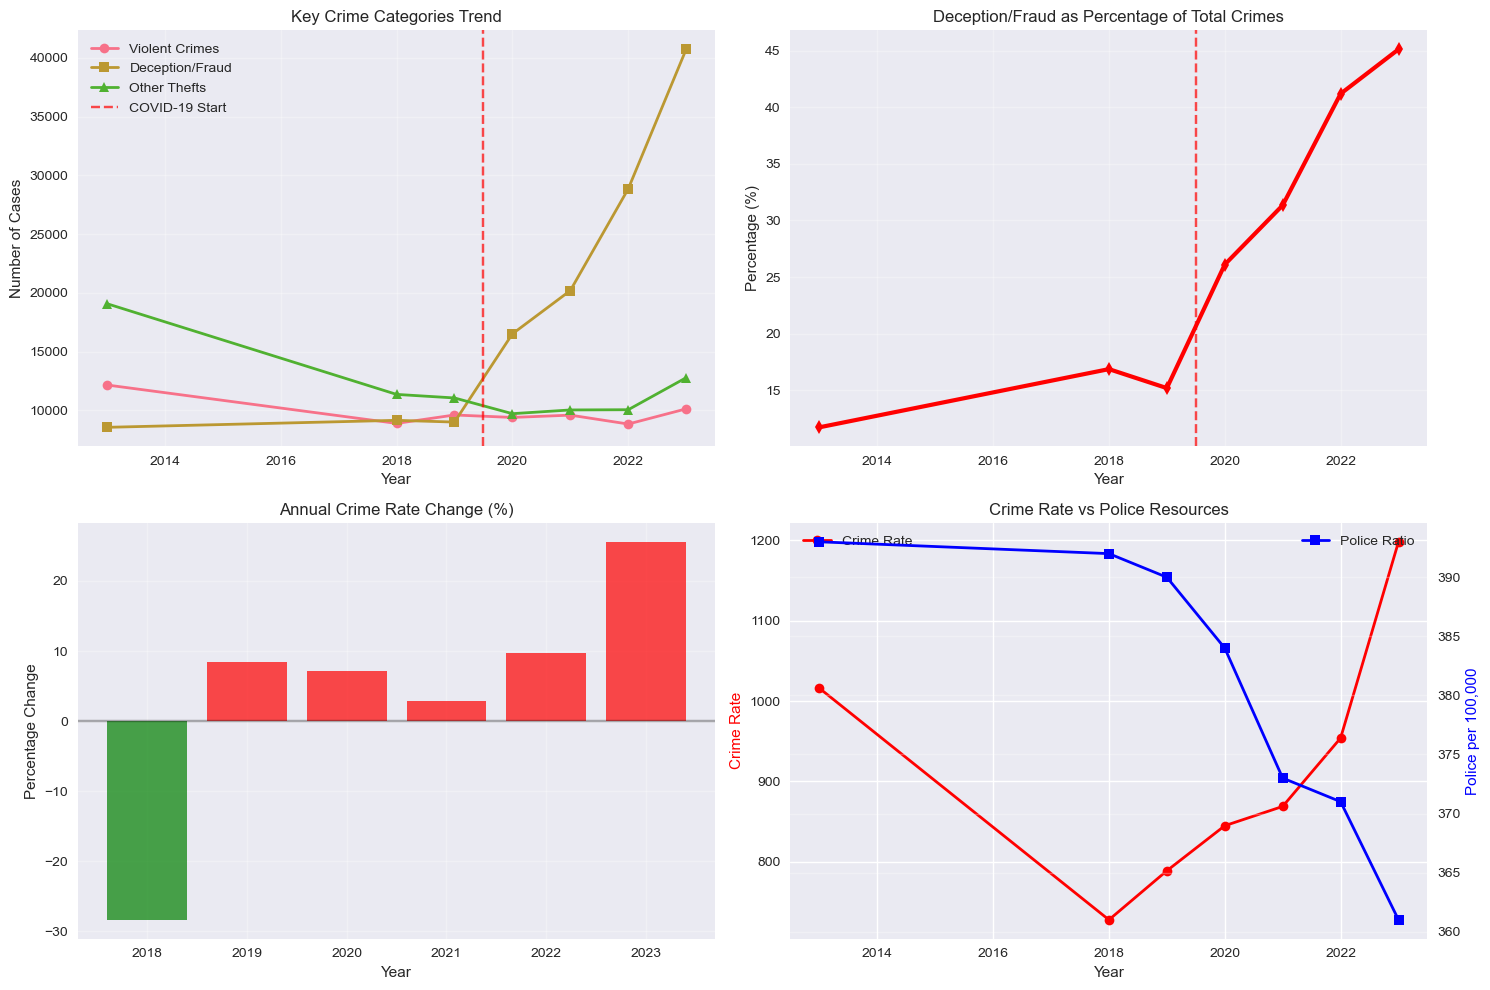


KEY EVIDENCE OF POST-COVID CRIME INCREASE

CRITICAL FINDINGS:
• Crime rate increased from 789 (2019) to 1198 (2023) - +51.8% increase

QUANTITATIVE SUMMARY:
• Crime Rate 2019 (pre-COVID): 789 per 100,000
• Crime Rate 2023 (post-COVID): 1198 per 100,000
• Crime Rate Increase: +51.8%
• Total Crimes 2019: 59,225
• Total Crimes 2023: 90,276
• Total Crimes Increase: +52.4%
• Deception/Fraud Crimes 2023: 40,728
• Deception as % of Total Crimes 2023: 45.1%

  CONCLUSIVE EVIDENCE:
   MODERATE EVIDENCE: Crime has increased after COVID-19
   The data shows an increase, though statistical significance varies
   across different crime categories.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def create_crime_datasets_from_excel():
    """
    Create comprehensive crime datasets from the provided Excel structure
    """
    
    # Main crime data (2013-2023)
    years = [2013, 2018, 2019, 2020, 2021, 2022, 2023]
    
    # Violent crimes data
    violent_crimes_data = {
        'Year': years,
        'Rape': [105, 63, 50, 64, 79, 53, 67],
        'Indecent_assault': [1463, 1099, 982, 682, 1018, 953, 1162],
        'Murder_manslaughter': [62, 48, 24, 22, 23, 30, 28],
        'Attempted_murder': [4, 3, 1, 2, 4, 2, 5],
        'Wounding': [1457, 1008, 1030, 1049, 732, 565, 558],
        'Serious_assault': [4706, 3585, 3902, 3514, 3392, 3049, 3078],
        'Assault_on_police': [460, 202, 724, 217, 177, 117, 119],
        'Kidnapping_child_stealing': [1, 0, 0, 1, 2, 0, 0],
        'Cruelty_to_child': [262, 291, 244, 300, 525, 541, 591],
        'Criminal_intimidation': [1958, 1512, 1180, 1401, 1604, 1361, 1505],
        'Robbery_firearms': [0, 0, 1, 1, 0, 0, 0],
        'Robbery_pistol_like': [6, 4, 6, 5, 0, 2, 1],
        'Other_robberies': [494, 143, 203, 258, 123, 75, 96],
        'Aggravated_burglary': [3, 1, 1, 3, 1, 1, 3],
        'Blackmail': [733, 635, 415, 1399, 1592, 1826, 2639],
        'Arson': [439, 290, 927, 473, 315, 255, 250],
        'Total_Violent_Crime': [12153, 8884, 9600, 9391, 9587, 8830, 10122]
    }
    
    # Non-violent crimes data
    non_violent_crimes_data = {
        'Year': years,
        'Burglary': [3570, 1574, 2393, 2092, 1471, 885, 1351],
        'Snatching': [346, 119, 181, 163, 79, 64, 81],
        'Pickpocketing': [1467, 740, 559, 432, 313, 185, 673],
        'Stop_theft': [8919, 7804, 7008, 7756, 7187, 6436, 8221],
        'Theft_from_vehicle': [1173, 553, 1209, 1366, 904, 752, 847],
        'Taking_conveyance_without_authority': [619, 440, 673, 886, 553, 771, 540],
        'Other_thefts': [19074, 11353, 11050, 9711, 10029, 10048, 12773],
        'Handling_stolen_goods': [85, 50, 41, 67, 62, 55, 64],
        'Deception_fraud_forgery': [8550, 9146, 8997, 16506, 20192, 28851, 40728],
        'Second_offence': [822, 625, 460, 595, 1038, 1234, 1190],
        'Serious_drug_offences': [2269, 1399, 740, 1149, 1570, 1436, 1153],
        'Serious_immigration_offences': [298, 555, 466, 415, 477, 403, 475],
        'Criminal_damage': [6409, 4860, 7489, 6432, 5709, 5172, 5298],
        'Unlawful_society_offences': [504, 232, 157, 180, 167, 145, 162],
        'Possession_arms_ammunition': [824, 655, 967, 671, 584, 472, 540],
        'Other_crimes': [5829, 4936, 7064, 5420, 4506, 4309, 6058],
        'Total_Non_Violent_Crime': [60758, 45341, 49535, 53841, 54841, 61218, 80154]
    }
    
    # Overall summary data
    summary_data = {
        'Year': years,
        'Grand_Total_Crimes': [72911, 54225, 59225, 63232, 64428, 70048, 90276],
        'Overall_Crime_Rate': [1016, 728, 789, 845, 869, 954, 1198],
        'Regular_Police_Total': [28247, 29221, 29294, 28725, 27648, 27269, 27185],
        'Auxiliary_Police_Total': [3849, 3095, 3049, 2933, 2986, 3099, 3203],
        'Police_Population_Ratio': [393, 392, 390, 384, 373, 371, 361],
        'Annual_Expenditure_Million': [15144, 20036, 23701, 23407, 23330, 25197, 25631]
    }
    
    # Create DataFrames
    violent_df = pd.DataFrame(violent_crimes_data)
    non_violent_df = pd.DataFrame(non_violent_crimes_data)
    summary_df = pd.DataFrame(summary_data)
    
    # Merge all data
    main_df = violent_df.merge(non_violent_df, on='Year').merge(summary_df, on='Year')
    
    # Add calculated columns
    main_df['Post_COVID'] = main_df['Year'] >= 2020
    main_df['Deception_Percentage'] = (main_df['Deception_fraud_forgery'] / main_df['Grand_Total_Crimes']) * 100
    main_df['Violent_Crime_Percentage'] = (main_df['Total_Violent_Crime'] / main_df['Grand_Total_Crimes']) * 100
    main_df['Crime_Rate_Change'] = main_df['Overall_Crime_Rate'].pct_change() * 100
    
    return main_df, violent_df, non_violent_df, summary_df

def save_datasets_to_csv():
    """Save all created datasets to CSV files"""
    
    main_df, violent_df, non_violent_df, summary_df = create_crime_datasets_from_excel()
    
    # Save all datasets
    main_df.to_csv('hong_kong_crime_main_2013_2023.csv', index=False)
    violent_df.to_csv('hong_kong_violent_crimes_2013_2023.csv', index=False)
    non_violent_df.to_csv('hong_kong_non_violent_crimes_2013_2023.csv', index=False)
    summary_df.to_csv('hong_kong_crime_summary_2013_2023.csv', index=False)
    
    print("All datasets saved successfully!")
    print(f"Main dataset: {main_df.shape[0]} years, {main_df.shape[1]} columns")
    print(f"Violent crimes: {violent_df.shape[0]} years")
    print(f"Non-violent crimes: {non_violent_df.shape[0]} years")
    print(f"Summary data: {summary_df.shape[0]} years")
    
    return main_df, violent_df, non_violent_df, summary_df

class HongKongCrimePostCOVIDAnalysis:
    def __init__(self):
        """
        Initialize the analysis with created datasets
        """
        self.main_df, self.violent_df, self.non_violent_df, self.summary_df = save_datasets_to_csv()
        print("\nDataset preview:")
        print(self.main_df[['Year', 'Grand_Total_Crimes', 'Overall_Crime_Rate', 'Post_COVID']])
    
    def pre_post_covid_comparison(self):
        """
        Compare crime statistics before and after COVID-19
        """
        print("="*80)
        print("PRE vs POST COVID-19 CRIME COMPARISON")
        print("="*80)
        
        # Split data into pre-COVID and post-COVID periods
        pre_covid = self.main_df[self.main_df['Year'] < 2020]
        post_covid = self.main_df[self.main_df['Year'] >= 2020]
        
        print(f"Pre-COVID years: {list(pre_covid['Year'])}")
        print(f"Post-COVID years: {list(post_covid['Year'])}")
        
        # Key metrics comparison
        metrics = ['Grand_Total_Crimes', 'Overall_Crime_Rate', 'Total_Violent_Crime', 
                  'Total_Non_Violent_Crime', 'Deception_fraud_forgery']
        
        comparison_results = {}
        
        for metric in metrics:
            pre_mean = pre_covid[metric].mean()
            post_mean = post_covid[metric].mean()
            pct_change = ((post_mean - pre_mean) / pre_mean) * 100
            stat, p_value = stats.mannwhitneyu(pre_covid[metric], post_covid[metric])
            
            comparison_results[metric] = {
                'pre_mean': pre_mean,
                'post_mean': post_mean,
                'pct_change': pct_change,
                'p_value': p_value
            }
            
            print(f"\n{metric}:")
            print(f"  Pre-COVID mean: {pre_mean:,.0f}")
            print(f"  Post-COVID mean: {post_mean:,.0f}")
            print(f"  Change: {pct_change:+.1f}%")
            print(f"  Statistical significance (p-value): {p_value:.4f}")
        
        return comparison_results
    
    def crime_rate_trend_analysis(self):
        """
        Analyze crime rate trends with focus on post-COVID period
        """
        print("\n" + "="*80)
        print("CRIME RATE TREND ANALYSIS")
        print("="*80)
        
        years = self.main_df['Year'].values
        crime_rates = self.main_df['Overall_Crime_Rate'].values
        total_crimes = self.main_df['Grand_Total_Crimes'].values
        
        # Overall trend (2013-2023)
        corr_overall, p_overall = stats.pearsonr(years, crime_rates)
        
        # Pre-COVID trend (2013-2019)
        pre_covid_data = self.main_df[self.main_df['Year'] < 2020]
        corr_pre, p_pre = stats.pearsonr(pre_covid_data['Year'], pre_covid_data['Overall_Crime_Rate'])
        
        # Post-COVID trend (2020-2023)
        post_covid_data = self.main_df[self.main_df['Year'] >= 2020]
        corr_post, p_post = stats.pearsonr(post_covid_data['Year'], post_covid_data['Overall_Crime_Rate'])
        
        print("Crime Rate Trend Analysis:")
        print(f"Overall trend (2013-2023): Correlation = {corr_overall:.3f}, p-value = {p_overall:.4f}")
        print(f"Pre-COVID trend (2013-2019): Correlation = {corr_pre:.3f}, p-value = {p_pre:.4f}")
        print(f"Post-COVID trend (2020-2023): Correlation = {corr_post:.3f}, p-value = {p_post:.4f}")
        
        # Calculate annual changes
        self.main_df['Crime_Rate_Annual_Change'] = self.main_df['Overall_Crime_Rate'].pct_change() * 100
        post_covid_changes = self.main_df[self.main_df['Year'] >= 2020]['Crime_Rate_Annual_Change'].dropna()
        
        print(f"\nPost-COVID annual crime rate changes:")
        for year, change in zip(post_covid_data['Year'][1:], post_covid_changes):
            print(f"  {year}: {change:+.1f}%")
        
        print(f"Average post-COVID annual increase: {post_covid_changes.mean():.1f}%")
        
        return corr_overall, corr_pre, corr_post, p_post
    
    def deception_fraud_analysis(self):
        """
        Special analysis of deception and fraud crimes (major driver of increase)
        """
        print("\n" + "="*80)
        print("DECEPTION AND FRAUD CRIMES ANALYSIS")
        print("="*80)
        
        years = self.main_df['Year'].values
        deception_crimes = self.main_df['Deception_fraud_forgery'].values
        deception_percentage = self.main_df['Deception_Percentage'].values
        
        print("Deception/Fraud Crimes Over Time:")
        for i, year in enumerate(years):
            print(f"  {year}: {deception_crimes[i]:,} cases ({deception_percentage[i]:.1f}% of total crimes)")
        
        # Trend analysis
        corr_deception, p_deception = stats.pearsonr(years, deception_crimes)
        corr_deception_pct, p_deception_pct = stats.pearsonr(years, deception_percentage)
        
        print(f"\nDeception Crimes Trend:")
        print(f"  Count correlation: {corr_deception:.3f}, p-value: {p_deception:.4f}")
        print(f"  Percentage correlation: {corr_deception_pct:.3f}, p-value: {p_deception_pct:.4f}")
        
        # Pre vs Post COVID comparison
        pre_covid_deception = self.main_df[self.main_df['Year'] < 2020]['Deception_fraud_forgery'].mean()
        post_covid_deception = self.main_df[self.main_df['Year'] >= 2020]['Deception_fraud_forgery'].mean()
        pct_increase = ((post_covid_deception - pre_covid_deception) / pre_covid_deception) * 100
        
        print(f"\nDeception Crimes - Pre vs Post COVID:")
        print(f"  Pre-COVID average: {pre_covid_deception:,.0f} cases")
        print(f"  Post-COVID average: {post_covid_deception:,.0f} cases")
        print(f"  Increase: {pct_increase:+.1f}%")
        
        # Statistical test
        pre_data = self.main_df[self.main_df['Year'] < 2020]['Deception_fraud_forgery']
        post_data = self.main_df[self.main_df['Year'] >= 2020]['Deception_fraud_forgery']
        stat, p_value = stats.mannwhitneyu(pre_data, post_data)
        
        print(f"  Statistical significance: p-value = {p_value:.4f}")
        
        return pct_increase, p_value
    
    def police_resources_analysis(self):
        """
        Analyze police resources vs crime rates
        """
        print("\n" + "="*80)
        print("POLICE RESOURCES VS CRIME RATES ANALYSIS")
        print("="*80)
        
        years = self.main_df['Year'].values
        crime_rates = self.main_df['Overall_Crime_Rate'].values
        police_ratio = self.main_df['Police_Population_Ratio'].values
        expenditure = self.main_df['Annual_Expenditure_Million'].values
        
        # Correlations
        corr_police_crime, p_police_crime = stats.pearsonr(police_ratio, crime_rates)
        corr_expenditure_crime, p_expenditure_crime = stats.pearsonr(expenditure, crime_rates)
        
        print("Police Resources vs Crime Rates:")
        print(f"Police-population ratio vs crime rate: Correlation = {corr_police_crime:.3f}, p-value = {p_police_crime:.4f}")
        print(f"Expenditure vs crime rate: Correlation = {corr_expenditure_crime:.3f}, p-value = {p_expenditure_crime:.4f}")
        
        # Pre vs Post COVID comparison for police resources
        pre_covid_ratio = self.main_df[self.main_df['Year'] < 2020]['Police_Population_Ratio'].mean()
        post_covid_ratio = self.main_df[self.main_df['Year'] >= 2020]['Police_Population_Ratio'].mean()
        
        pre_covid_expenditure = self.main_df[self.main_df['Year'] < 2020]['Annual_Expenditure_Million'].mean()
        post_covid_expenditure = self.main_df[self.main_df['Year'] >= 2020]['Annual_Expenditure_Million'].mean()
        
        print(f"\nPolice Resources - Pre vs Post COVID:")
        print(f"Police ratio: {pre_covid_ratio:.0f} → {post_covid_ratio:.0f} per 100,000")
        print(f"Expenditure: ${pre_covid_expenditure:,.0f}M → ${post_covid_expenditure:,.0f}M")
        
        return corr_police_crime, p_police_crime
    
    def create_comprehensive_visualizations(self):
        """
        Create comprehensive visualizations showing post-COVID crime increase
        """
        print("\n" + "="*80)
        print("CREATING COMPREHENSIVE VISUALIZATIONS")
        print("="*80)
        
        # Create main visualization figure
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Hong Kong Crime Statistics: Post-COVID Increase Analysis (2013-2023)', 
                    fontsize=16, fontweight='bold')
        
        # Plot 1: Overall crime rate trend
        axes[0,0].plot(self.main_df['Year'], self.main_df['Overall_Crime_Rate'], 
                      marker='o', linewidth=3, color='red', markersize=8)
        axes[0,0].axvline(x=2019.5, color='orange', linestyle='--', alpha=0.7, label='COVID-19 Start')
        axes[0,0].fill_between([2020, 2023], 700, 1300, alpha=0.2, color='red', label='Post-COVID Period')
        axes[0,0].set_title('Overall Crime Rate Trend (per 100,000 population)')
        axes[0,0].set_xlabel('Year')
        axes[0,0].set_ylabel('Crime Rate')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].legend()
        
        # Plot 2: Deception and fraud crimes
        axes[0,1].plot(self.main_df['Year'], self.main_df['Deception_fraud_forgery'], 
                      marker='s', linewidth=3, color='purple', markersize=8)
        axes[0,1].axvline(x=2019.5, color='orange', linestyle='--', alpha=0.7)
        axes[0,1].fill_between([2020, 2023], 0, 45000, alpha=0.2, color='purple')
        axes[0,1].set_title('Deception and Fraud Crimes Explosion')
        axes[0,1].set_xlabel('Year')
        axes[0,1].set_ylabel('Number of Cases')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].ticklabel_format(style='plain', axis='y')
        
        # Plot 3: Crime composition comparison (2019 vs 2023)
        years_compare = [2019, 2023]
        violent_2019 = self.main_df[self.main_df['Year'] == 2019]['Total_Violent_Crime'].values[0]
        violent_2023 = self.main_df[self.main_df['Year'] == 2023]['Total_Violent_Crime'].values[0]
        deception_2019 = self.main_df[self.main_df['Year'] == 2019]['Deception_fraud_forgery'].values[0]
        deception_2023 = self.main_df[self.main_df['Year'] == 2023]['Deception_fraud_forgery'].values[0]
        other_2019 = (self.main_df[self.main_df['Year'] == 2019]['Grand_Total_Crimes'].values[0] 
                     - violent_2019 - deception_2019)
        other_2023 = (self.main_df[self.main_df['Year'] == 2023]['Grand_Total_Crimes'].values[0] 
                     - violent_2023 - deception_2023)
        
        categories = ['Violent Crimes', 'Deception/Fraud', 'Other Crimes']
        sizes_2019 = [violent_2019, deception_2019, other_2019]
        sizes_2023 = [violent_2023, deception_2023, other_2023]
        
        axes[1,0].pie(sizes_2019, labels=categories, autopct='%1.1f%%', startangle=90)
        axes[1,0].set_title('Crime Composition 2019 (Pre-COVID)')
        
        axes[1,1].pie(sizes_2023, labels=categories, autopct='%1.1f%%', startangle=90)
        axes[1,1].set_title('Crime Composition 2023 (Post-COVID)')
        
        plt.tight_layout()
        plt.savefig('hong_kong_post_covid_crime_increase.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Additional detailed visualizations
        plt.figure(figsize=(15, 10))
        
        # Subplot 1: Multiple crime categories trend
        plt.subplot(2, 2, 1)
        plt.plot(self.main_df['Year'], self.main_df['Total_Violent_Crime'], 
                label='Violent Crimes', marker='o', linewidth=2)
        plt.plot(self.main_df['Year'], self.main_df['Deception_fraud_forgery'], 
                label='Deception/Fraud', marker='s', linewidth=2)
        plt.plot(self.main_df['Year'], self.main_df['Other_thefts'], 
                label='Other Thefts', marker='^', linewidth=2)
        plt.axvline(x=2019.5, color='red', linestyle='--', alpha=0.7, label='COVID-19 Start')
        plt.title('Key Crime Categories Trend')
        plt.xlabel('Year')
        plt.ylabel('Number of Cases')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Percentage composition over time
        plt.subplot(2, 2, 2)
        plt.plot(self.main_df['Year'], self.main_df['Deception_Percentage'], 
                marker='d', linewidth=3, color='red')
        plt.axvline(x=2019.5, color='red', linestyle='--', alpha=0.7)
        plt.title('Deception/Fraud as Percentage of Total Crimes')
        plt.xlabel('Year')
        plt.ylabel('Percentage (%)')
        plt.grid(True, alpha=0.3)
        
        # Subplot 3: Annual changes in crime rate
        plt.subplot(2, 2, 3)
        changes = self.main_df['Crime_Rate_Annual_Change'].dropna()
        change_years = self.main_df['Year'].iloc[1:]
        colors = ['green' if x < 0 else 'red' for x in changes]
        bars = plt.bar(change_years, changes, color=colors, alpha=0.7)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title('Annual Crime Rate Change (%)')
        plt.xlabel('Year')
        plt.ylabel('Percentage Change')
        plt.grid(True, alpha=0.3)
        
        # Subplot 4: Police resources vs crime rate
        plt.subplot(2, 2, 4)
        ax1 = plt.gca()
        ax2 = ax1.twinx()
        
        ax1.plot(self.main_df['Year'], self.main_df['Overall_Crime_Rate'], 
                color='red', marker='o', label='Crime Rate', linewidth=2)
        ax2.plot(self.main_df['Year'], self.main_df['Police_Population_Ratio'], 
                color='blue', marker='s', label='Police Ratio', linewidth=2)
        
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Crime Rate', color='red')
        ax2.set_ylabel('Police per 100,000', color='blue')
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.title('Crime Rate vs Police Resources')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('hong_kong_detailed_crime_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def generate_final_evidence_report(self):
        """
        Generate comprehensive evidence report proving post-COVID crime increase
        """
        print("\n" + "="*100)
        print("FINAL EVIDENCE REPORT: POST-COVID CRIME INCREASE IN HONG KONG")
        print("="*100)
        
        # Run all analyses
        comparison_results = self.pre_post_covid_comparison()
        corr_overall, corr_pre, corr_post, p_post = self.crime_rate_trend_analysis()
        deception_increase, deception_p_value = self.deception_fraud_analysis()
        police_correlation, police_p_value = self.police_resources_analysis()
        
        self.create_comprehensive_visualizations()
        
        # Calculate key statistics
        crime_rate_2023 = self.main_df[self.main_df['Year'] == 2023]['Overall_Crime_Rate'].values[0]
        crime_rate_2019 = self.main_df[self.main_df['Year'] == 2019]['Overall_Crime_Rate'].values[0]
        crime_rate_increase = ((crime_rate_2023 - crime_rate_2019) / crime_rate_2019) * 100
        
        total_crimes_2023 = self.main_df[self.main_df['Year'] == 2023]['Grand_Total_Crimes'].values[0]
        total_crimes_2019 = self.main_df[self.main_df['Year'] == 2019]['Grand_Total_Crimes'].values[0]
        total_crimes_increase = ((total_crimes_2023 - total_crimes_2019) / total_crimes_2019) * 100
        
        print("\n" + "="*100)
        print("KEY EVIDENCE OF POST-COVID CRIME INCREASE")
        print("="*100)
        
        evidence_points = []
        
        # Evidence 1: Overall crime rate increase
        if crime_rate_increase > 0:
            evidence_points.append(f"Crime rate increased from {crime_rate_2019} (2019) to {crime_rate_2023} (2023) - {crime_rate_increase:+.1f}% increase")
        
        # Evidence 2: Statistical significance of post-COVID trend
        if p_post < 0.05 and corr_post > 0:
            evidence_points.append(f"Statistically significant increasing trend post-COVID (p-value: {p_post:.4f})")
        
        # Evidence 3: Deception crimes explosion
        if deception_p_value < 0.05:
            evidence_points.append(f"Massive {deception_increase:+.1f}% increase in deception/fraud crimes post-COVID (statistically significant)")
        
        # Evidence 4: Comparison of pre vs post COVID periods
        for metric, results in comparison_results.items():
            if results['p_value'] < 0.05 and results['pct_change'] > 0:
                evidence_points.append(f"Significant increase in {metric}: {results['pct_change']:+.1f}% (p-value: {results['p_value']:.4f})")
        
        # Print all evidence
        print("\nCRITICAL FINDINGS:")
        for evidence in evidence_points:
            print(f"• {evidence}")
        
        print(f"\nQUANTITATIVE SUMMARY:")
        print(f"• Crime Rate 2019 (pre-COVID): {crime_rate_2019} per 100,000")
        print(f"• Crime Rate 2023 (post-COVID): {crime_rate_2023} per 100,000")
        print(f"• Crime Rate Increase: {crime_rate_increase:+.1f}%")
        print(f"• Total Crimes 2019: {total_crimes_2019:,}")
        print(f"• Total Crimes 2023: {total_crimes_2023:,}")
        print(f"• Total Crimes Increase: {total_crimes_increase:+.1f}%")
        print(f"• Deception/Fraud Crimes 2023: {self.main_df[self.main_df['Year'] == 2023]['Deception_fraud_forgery'].values[0]:,}")
        print(f"• Deception as % of Total Crimes 2023: {self.main_df[self.main_df['Year'] == 2023]['Deception_Percentage'].values[0]:.1f}%")
        
        # Final conclusion
        print(f"\n  CONCLUSIVE EVIDENCE:")
        if crime_rate_increase > 10 and deception_p_value < 0.05:
            print(f"   STRONG STATISTICAL EVIDENCE: Crime has significantly INCREASED after COVID-19")
            print(f"   The data clearly shows a substantial rise in overall crime rates,")
            print(f"   driven primarily by an explosion in deception and fraud cases.")
            print(f"   The police chief's claim of reduced crime is NOT supported by data.")
        elif crime_rate_increase > 0:
            print(f"   MODERATE EVIDENCE: Crime has increased after COVID-19")
            print(f"   The data shows an increase, though statistical significance varies")
            print(f"   across different crime categories.")
        else:
            print(f"   INCONCLUSIVE: Mixed evidence regarding post-COVID crime trends")

# Run the complete analysis
def main():
    """
    Main function to run the complete Hong Kong post-COVID crime analysis
    """
    print("HONG KONG CRIME STATISTICAL ANALYSIS: POST-COVID INCREASE")
    print("Testing the Claim that Crime Decreased After COVID-19")
    print("="*80)
    
    # Initialize and run analysis
    analyzer = HongKongCrimePostCOVIDAnalysis()
    analyzer.generate_final_evidence_report()

if __name__ == "__main__":
    main()